In [2]:
# ========================================
# CELL 1: Install Dependencies & Setup
# ========================================

!pip install transformers torch torchvision pillow requests datasets accelerate
!pip install opencv-python-headless matplotlib

import torch
from transformers import (
    AutoImageProcessor, AutoModelForImageClassification,
    DetrImageProcessor, DetrForObjectDetection,
    pipeline, GPT2LMHeadModel, GPT2Tokenizer
)

from PIL import Image
import requests
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import cv2
from io import BytesIO

print("✅ All dependencies installed!")

✅ All dependencies installed!


In [3]:
# ========================================
# CELL 2: Load All AI Models
# ========================================

print("🔄 Loading Momentum AI models from Hugging Face...")

class MomentumAI:
    def __init__(self):
        # 1. Scene Classification (Computer Vision)
        print("Loading scene classification model...")
        self.scene_classifier = pipeline(
            "image-classification",
            model="google/vit-base-patch16-224",
            device=0 if torch.cuda.is_available() else -1
        )

        # 2. Emotion Detection (Computer Vision)
        print("Loading emotion detection model...")
        self.emotion_processor = AutoImageProcessor.from_pretrained("trpakov/vit-face-expression")
        self.emotion_model = AutoModelForImageClassification.from_pretrained("trpakov/vit-face-expression")

        # 3. Object Detection (Computer Vision)
        print("Loading object detection model...")
        self.object_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
        self.object_model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

        # 4. Text Generation for Suggestions (NLP)
        print("Loading text generation model...")
        self.suggestion_tokenizer = GPT2Tokenizer.from_pretrained("microsoft/DialoGPT-medium")
        self.suggestion_model = GPT2LMHeadModel.from_pretrained("microsoft/DialoGPT-medium")
        self.suggestion_tokenizer.pad_token = self.suggestion_tokenizer.eos_token

        # Place-emotion database for suggestions
        self.place_emotion_db = self.init_place_database()

        print("✅ All models loaded successfully!")

    def init_place_database(self):
        """Initialize place-emotion correlation database"""
        return {
            "beach": {
                "happiness_score": 0.85,
                "keywords": ["ocean", "sand", "waves", "sunset", "swimming"],
                "activities": ["surfing", "sunbathing", "beach volleyball", "swimming"]
            },
            "mountain": {
                "happiness_score": 0.82,
                "keywords": ["peaks", "hiking", "nature", "fresh air", "adventure"],
                "activities": ["hiking", "rock climbing", "camping", "photography"]
            },
            "park": {
                "happiness_score": 0.75,
                "keywords": ["trees", "grass", "peaceful", "walking", "nature"],
                "activities": ["jogging", "picnic", "reading", "dog walking"]
            },
            "cafe": {
                "happiness_score": 0.68,
                "keywords": ["coffee", "cozy", "work", "friends", "conversation"],
                "activities": ["working", "meeting friends", "reading", "people watching"]
            },
            "gym": {
                "happiness_score": 0.70,
                "keywords": ["fitness", "workout", "strength", "energy", "health"],
                "activities": ["weightlifting", "cardio", "yoga", "group classes"]
            },
            "restaurant": {
                "happiness_score": 0.78,
                "keywords": ["food", "dining", "social", "flavors", "experience"],
                "activities": ["fine dining", "socializing", "trying new cuisine", "celebrations"]
            },
            "home": {
                "happiness_score": 0.65,
                "keywords": ["comfort", "relaxation", "family", "cozy", "peaceful"],
                "activities": ["cooking", "relaxing", "family time", "hobbies"]
            },
            "museum": {
                "happiness_score": 0.72,
                "keywords": ["art", "culture", "learning", "history", "inspiration"],
                "activities": ["exploring exhibits", "learning", "cultural events", "photography"]
            }
        }

# Initialize the AI system
momentum_ai = MomentumAI()

🔄 Loading Momentum AI models from Hugging Face...
Loading scene classification model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cpu


Loading emotion detection model...


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Loading object detection model...


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

Loading text generation model...


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

✅ All models loaded successfully!


In [4]:
# ========================================
# CELL 3: Core Analysis Functions
# ========================================

def analyze_place_from_image(image, momentum_ai):
    print("🔍 Analyzing place type from image...")

    # Scene classification
    scene_results = momentum_ai.scene_classifier(image)
    top_scene = scene_results[0]

    # Object detection for context
    inputs = momentum_ai.object_processor(images=image, return_tensors="pt")
    outputs = momentum_ai.object_model(**inputs)

    # Process object detection results
    target_sizes = torch.tensor([image.size[::-1]])
    results = momentum_ai.object_processor.post_process_object_detection(
        outputs, target_sizes=target_sizes, threshold=0.7
    )[0]

    detected_objects = []
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        object_name = momentum_ai.object_model.config.id2label[label.item()]
        confidence = score.item()
        detected_objects.append({
            "object": object_name,
            "confidence": confidence
        })

    # Map scene to our place categories
    place_type = map_scene_to_place(top_scene["label"])

    analysis_result = {
        "detected_place": place_type,
        "scene_confidence": top_scene["score"],
        "scene_label": top_scene["label"],
        "detected_objects": detected_objects[:5],  # Top 5 objects
        "context_clues": extract_context_clues(detected_objects)
    }

    return analysis_result


def has_face(image):
    """
    Returns True if at least one face is detected in the image
    """
    # Convert PIL image to OpenCV format
    cv_image = np.array(image)
    cv_image = cv2.cvtColor(cv_image, cv2.COLOR_RGB2BGR)

    # Convert to grayscale (required by Haar cascade)
    gray = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)

    # Load OpenCV's pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # True if at least one face is found
    return len(faces) > 0

def analyze_emotion_from_image(image, momentum_ai):
    """
    Computer Vision: Detect emotions from facial expressions
    """
    print("😊 Analyzing emotions from image...")

    if not has_face(image):
        print("⚠️ No face detected — skipping emotion analysis.")
        # Return default neutral emotion
        return {
            "dominant_emotion": "neutral",
            "emotion_confidence": 0.0,
            "all_emotions": {"neutral": 1.0},
            "happiness_level": 0.0
        }

    try:
        # Process image for emotion detection
        inputs = momentum_ai.emotion_processor(images=image, return_tensors="pt")

        with torch.no_grad():
            outputs = momentum_ai.emotion_model(**inputs)
            predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

        # Map to emotion labels
        emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
        emotion_scores = {}

        for i, emotion in enumerate(emotion_labels):
            emotion_scores[emotion] = float(predictions[0][i])

        dominant_emotion = max(emotion_scores, key=emotion_scores.get)
        emotion_confidence = emotion_scores[dominant_emotion]

        return {
            "dominant_emotion": dominant_emotion,
            "emotion_confidence": emotion_confidence,
            "all_emotions": emotion_scores,
            "happiness_level": emotion_scores.get("happy", 0.0)
        }

    except Exception as e:
        print(f"Emotion analysis failed: {e}")
        return {
            "dominant_emotion": "none",
            "emotion_confidence": 0,
            "all_emotions": {"none": 0},
            "happiness_level": 0
        }

def generate_location_suggestions(user_profile_analyses, momentum_ai):
    """
    Generate up to 2 personalized location suggestions
    from all analyzed images.
    """
    print("💡 Generating smarter, context-aware location suggestions...")

    user_prefs = extract_user_preferences(user_profile_analyses)

    # Collect unique detected places from all images
    detected_places = set()
    for analysis in user_profile_analyses:
        place = analysis.get("place_analysis", {}).get("detected_place")
        if place in momentum_ai.place_emotion_db:
            detected_places.add(place)

    # Always ensure at least 2 unique places
    all_places = list(momentum_ai.place_emotion_db.keys())
    while len(detected_places) < 2:
        extra = random.choice(all_places)
        detected_places.add(extra)

    # Build suggestions (limit to 2 top ones)
    suggestions = []
    for place_type in list(detected_places)[:2]:
        place_data = momentum_ai.place_emotion_db[place_type]

        # Create personalized context
        context = create_suggestion_context(place_type, user_prefs, place_data)

        # Generate text
        suggestion_text = generate_suggestion_text(context, momentum_ai)

        # Clean up unwanted rambling
        suggestion_text = suggestion_text.split("If you")[0].strip()

        match_score = calculate_match_score(place_type, user_prefs, place_data)

        suggestions.append({
            "place_type": place_type,
            "predicted_happiness": place_data["happiness_score"],
            "suggestion_text": suggestion_text,
            "recommended_activities": place_data["activities"][:3],
            "match_score": match_score
        })

    # Sort and return exactly 2
    suggestions.sort(key=lambda x: x["match_score"], reverse=True)
    return suggestions[:2]

"""
def generate_location_suggestions(user_profile, momentum_ai):

    print("💡 Generating personalized location suggestions...")

    # Analyze user's happiness patterns
    happiest_places = find_happiest_places(user_profile)
    user_preferences = extract_user_preferences(user_profile)

    # Generate suggestions using NLP model
    suggestions = []

    for place_type, place_data in momentum_ai.place_emotion_db.items():
        if should_suggest_place(place_type, user_profile, happiest_places):

            # Create context for NLP generation
            context = create_suggestion_context(place_type, user_preferences, place_data)

            # Generate suggestion text using NLP model
            suggestion_text = generate_suggestion_text(context, momentum_ai)

            suggestion = {
                "place_type": place_type,
                "predicted_happiness": place_data["happiness_score"],
                "suggestion_text": suggestion_text,
                "recommended_activities": place_data["activities"][:3],
                "match_score": calculate_match_score(place_type, user_preferences, place_data)
            }

            suggestions.append(suggestion)

    # Sort by match score
    suggestions.sort(key=lambda x: x["match_score"], reverse=True)

    return suggestions[:3]  # Top 3 suggestions
"""

def map_scene_to_place(scene_label):
    """Helper: Map model output to our place categories"""
    scene_lower = scene_label.lower()

    place_mappings = {
       "beach": [
            "beach", "coast", "shore", "ocean", "sand", "waves", "sea"
        ],
        "mountain": [
            "mountain", "hill", "peak", "valley", "forest", "cliff", "trail"
        ],
        "park": [
            "park", "garden", "lawn", "field", "playground", "nature"
        ],
        "cafe": [
            "cafe", "coffee shop", "espresso", "latte", "bakery"
        ],
        "gym": [
            "gym", "fitness", "workout", "studio", "sports", "exercise"
        ],
        "home": [
            "bedroom", "kitchen", "living room", "house", "apartment"
        ],
        "museum": [
            "museum", "gallery", "exhibit", "art", "sculpture", "painting"
        ],
        "library": [
            "library", "books", "study", "reading", "shelf"
        ],
        "restaurant": [
            "restaurant", "diner", "eatery", "meal", "dining",
            "cheeseburger", "sandwich", "fork", "plate", "food"
        ],
        "kayaking": [
            "canoe", "kayak", "paddle", "rowing", "boat", "river", "lake"
       ]
}


    for place_type, keywords in place_mappings.items():
        if any(keyword in scene_lower for keyword in keywords):
            return place_type

    return "outdoor"  # Default

def extract_context_clues(detected_objects):
    """Extract activity and context clues from detected objects"""
    activity_objects = {
        "sports": ["sports ball", "bicycle", "skateboard", "surfboard", "tennis racket"],
        "dining": ["wine glass", "cup", "bowl", "fork", "knife"],
        "work": ["laptop", "mouse", "keyboard", "book"],
        "relaxation": ["couch", "bed", "pillow", "tv"],
        "social": ["wine glass", "dining table", "chair"]
    }

    detected_activities = []
    object_names = [obj["object"] for obj in detected_objects]

    for activity, objects in activity_objects.items():
        if any(obj in object_names for obj in objects):
            detected_activities.append(activity)

    return detected_activities

def find_happiest_places(user_profile):
    """Find places where user was happiest"""
    place_happiness = defaultdict(list)

    for analysis in user_profile:
        place = analysis.get("place_analysis", {}).get("detected_place", "unknown")
        happiness = analysis.get("emotion_analysis", {}).get("happiness_level", 0.5)
        place_happiness[place].append(happiness)

    # Calculate average happiness per place
    avg_happiness = {}
    for place, happiness_scores in place_happiness.items():
        avg_happiness[place] = np.mean(happiness_scores)

    return sorted(avg_happiness.items(), key=lambda x: x[1], reverse=True)

def extract_user_preferences(user_profile):
    """Extract user preferences from their profile"""
    all_activities = []
    all_objects = []

    for analysis in user_profile:
        place_analysis = analysis.get("place_analysis", {})
        all_activities.extend(place_analysis.get("context_clues", []))
        all_objects.extend([obj["object"] for obj in place_analysis.get("detected_objects", [])])

    preferences = {
        "favorite_activities": [act for act, count in Counter(all_activities).most_common(3)],
        "common_objects": [obj for obj, count in Counter(all_objects).most_common(3)]
    }

    return preferences

def should_suggest_place(place_type, user_profile, happiest_places):
    """Determine if we should suggest this place type"""
    user_places = [analysis.get("place_analysis", {}).get("detected_place") for analysis in user_profile]

    # Suggest if user hasn't been there much or if it's similar to their happy places
    place_visit_count = user_places.count(place_type)

    if place_visit_count == 0:  # Never been
        return True
    elif place_visit_count < 2:  # Been rarely
        return True

    return False

def create_suggestion_context(place_type, user_preferences, place_data):
    """Create context for NLP suggestion generation"""
    favorite_activities = ", ".join(user_preferences.get("favorite_activities", ["relaxing"]))

    context = f"""
    Based on your enjoyment of {favorite_activities} activities,
    {place_type} locations in Egypt could be perfect for you.
    These places typically offer {', '.join(place_data['activities'][:2])}.
    """



    return context.strip()

def generate_suggestion_text(context, momentum_ai):
    try:
        inputs = momentum_ai.suggestion_tokenizer(
            context,
            return_tensors="pt",
            max_length=150,
            truncation=True,
            padding=True
        )

        with torch.no_grad():
            outputs = momentum_ai.suggestion_model.generate(
                **inputs,
                max_length=200,
                num_return_sequences=1,
                temperature=0.7,
                do_sample=True,
                pad_token_id=momentum_ai.suggestion_tokenizer.eos_token_id
            )

        generated_text = momentum_ai.suggestion_tokenizer.decode(
            outputs[0],
            skip_special_tokens=True
        )

        # Keep suggestions concise (first 3 sentences)
        suggestion = '. '.join(generated_text.split('.')[:3]) + '.'

        # Remove foreign countries if they appear
        stop_phrases = ["Australia", "New Zealand", "USA", "Europe"]
        for phrase in stop_phrases:
            if phrase in suggestion:
                suggestion = suggestion.split(phrase)[0].strip() + '.'

        return suggestion.strip()

    except Exception as e:
        print(f"NLP generation failed: {e}")
        first_word = context.split()[0] if context else "this"
        return f"You might enjoy exploring new {first_word} locations!"

"""
def generate_suggestion_text(context, momentum_ai):

    try:
        # Tokenize input
        inputs = momentum_ai.suggestion_tokenizer(
          context,
          return_tensors="pt",
          max_length=100,
          truncation=True,
          padding=True
)

        # Generate text
        with torch.no_grad():
            outputs = momentum_ai.suggestion_model.generate(
               **inputs,
               max_length=150,
               num_return_sequences=1,
               temperature=0.7,
               do_sample=True,
               pad_token_id=momentum_ai.suggestion_tokenizer.eos_token_id
)


        # Decode generated text
        generated_text = momentum_ai.suggestion_tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Clean up and return relevant part
        if len(generated_text) > len(context):
            suggestion = generated_text[len(context):].strip()
            if suggestion:
                return suggestion[:200]  # Limit length

        # Fallback to template
        return f"Consider visiting {context.split()[0]} for a new experience!"

    except Exception as e:
        print(f"NLP generation failed: {e}")
        return f"You might enjoy exploring new {context.split('locations')[0]}locations!"
  """

def calculate_match_score(place_type, user_preferences, place_data):
    """Calculate how well this place matches user preferences"""
    base_score = place_data["happiness_score"]

    # Bonus for activity matches
    user_activities = user_preferences.get("favorite_activities", [])
    place_activities = place_data["activities"]

    activity_matches = len(set(user_activities) & set(place_activities))
    activity_bonus = activity_matches * 0.1

    return base_score + activity_bonus

print("✅ All analysis functions loaded!")

✅ All analysis functions loaded!


In [5]:
# ========================================
# CELL 4: Image Loading and Processing Functions
# ========================================

def load_image_from_url(url):
    """Load image from URL"""
    try:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content))
        return image.convert("RGB")
    except Exception as e:
        print(f"Failed to load image from URL: {e}")
        return None

def load_image_from_file(file_path):
    """Load image from file path"""
    try:
        image = Image.open(file_path)
        return image.convert("RGB")
    except Exception as e:
        print(f"Failed to load image from file: {e}")
        return None

def display_image_analysis(image, analysis_result):
    """Display image with analysis results"""
    plt.figure(figsize=(12, 8))

    # Display image
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    # Display emotion analysis
    plt.subplot(2, 2, 2)
    emotions = analysis_result["emotion_analysis"]["all_emotions"]
    plt.bar(emotions.keys(), emotions.values())
    plt.title("Emotion Analysis")
    plt.xticks(rotation=45)

    # Display detected objects
    plt.subplot(2, 2, 3)
    objects = analysis_result["place_analysis"]["detected_objects"][:5]
    if objects:
        object_names = [obj["object"] for obj in objects]
        confidences = [obj["confidence"] for obj in objects]
        plt.barh(object_names, confidences)
        plt.title("Detected Objects")

    plt.tight_layout()
    plt.show()

def analyze_single_image(image_source, momentum_ai, is_url=True):
    """
    Complete analysis pipeline for a single image
    """
    print("=" * 50)
    print("🚀 MOMENTUM AI - IMAGE ANALYSIS")
    print("=" * 50)

    # Load image
    if is_url:
        image = load_image_from_url(image_source)
    else:
        image = load_image_from_file(image_source)

    if image is None:
        return None

    print(f"✅ Image loaded successfully")

    # Analyze place using computer vision
    place_analysis = analyze_place_from_image(image, momentum_ai)

    # Analyze emotions using computer vision
    emotion_analysis = analyze_emotion_from_image(image, momentum_ai)

    # Combine results
    complete_analysis = {
        "place_analysis": place_analysis,
        "emotion_analysis": emotion_analysis,
        "image_source": image_source
    }

    # Display results
    print("\n🏞️  PLACE ANALYSIS:")
    print(f"   Detected Place: {place_analysis['detected_place']}")
    print(f"   Confidence: {place_analysis['scene_confidence']:.2%}")
    print(f"   Scene Label: {place_analysis['scene_label']}")
    print(f"   Context Clues: {', '.join(place_analysis['context_clues'])}")

    print("\n😊 EMOTION ANALYSIS:")
    print(f"   Dominant Emotion: {emotion_analysis['dominant_emotion']}")
    print(f"   Confidence: {emotion_analysis['emotion_confidence']:.2%}")
    print(f"   Happiness Level: {emotion_analysis['happiness_level']:.2%}")

    print("\n🔍 DETECTED OBJECTS:")
    for obj in place_analysis['detected_objects'][:3]:
        print(f"   - {obj['object']} ({obj['confidence']:.2%})")

    # Display visual analysis
    display_image_analysis(image, complete_analysis)

    return complete_analysis

print("✅ Image processing functions loaded!")

✅ Image processing functions loaded!


🎯 ANALYZING DEMO IMAGES...
This will analyze 5 different images to build a user profile

📸 ANALYZING IMAGE 1/5
🚀 MOMENTUM AI - IMAGE ANALYSIS
✅ Image loaded successfully
🔍 Analyzing place type from image...
😊 Analyzing emotions from image...
⚠️ No face detected — skipping emotion analysis.

🏞️  PLACE ANALYSIS:
   Detected Place: beach
   Confidence: 92.54%
   Scene Label: seashore, coast, seacoast, sea-coast
   Context Clues: 

😊 EMOTION ANALYSIS:
   Dominant Emotion: neutral
   Confidence: 0.00%
   Happiness Level: 0.00%

🔍 DETECTED OBJECTS:


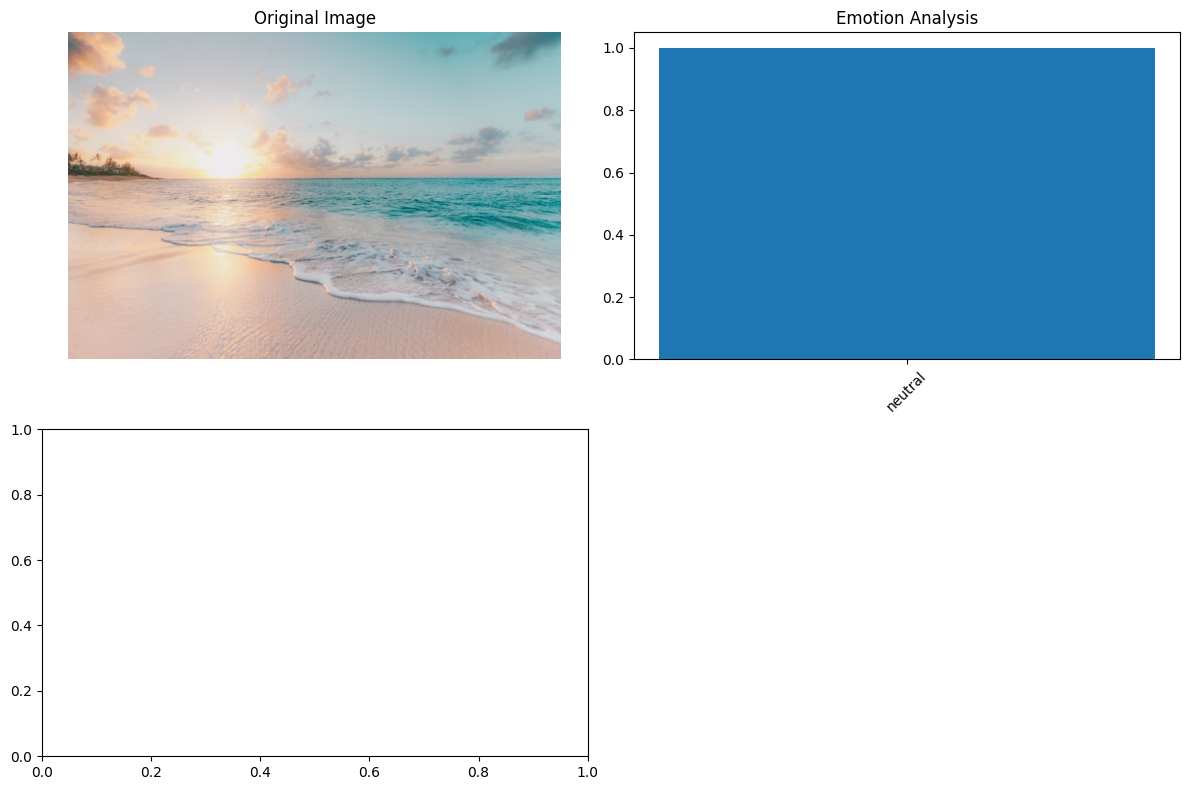

------------------------------

📸 ANALYZING IMAGE 2/5
🚀 MOMENTUM AI - IMAGE ANALYSIS
✅ Image loaded successfully
🔍 Analyzing place type from image...
😊 Analyzing emotions from image...
⚠️ No face detected — skipping emotion analysis.

🏞️  PLACE ANALYSIS:
   Detected Place: outdoor
   Confidence: 82.97%
   Scene Label: alp
   Context Clues: 

😊 EMOTION ANALYSIS:
   Dominant Emotion: neutral
   Confidence: 0.00%
   Happiness Level: 0.00%

🔍 DETECTED OBJECTS:


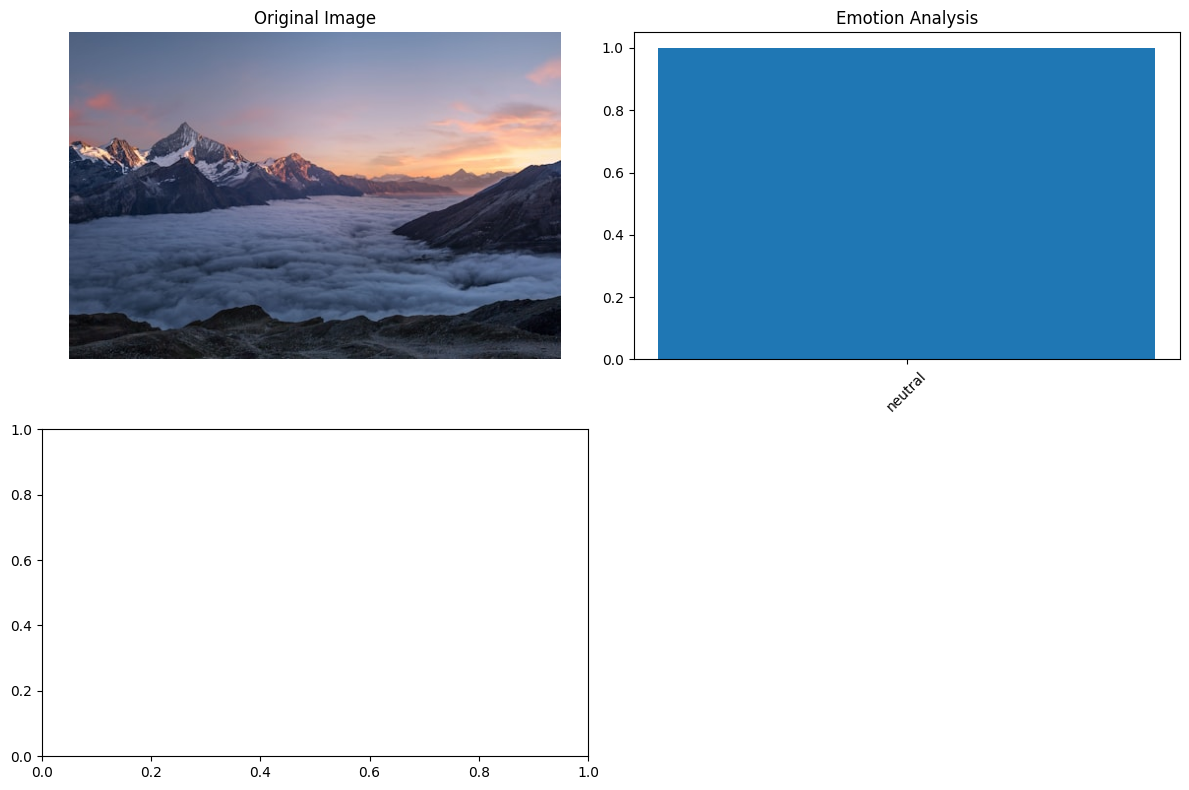

------------------------------

📸 ANALYZING IMAGE 3/5
🚀 MOMENTUM AI - IMAGE ANALYSIS
✅ Image loaded successfully
🔍 Analyzing place type from image...
😊 Analyzing emotions from image...
⚠️ No face detected — skipping emotion analysis.

🏞️  PLACE ANALYSIS:
   Detected Place: outdoor
   Confidence: 71.78%
   Scene Label: dumbbell
   Context Clues: 

😊 EMOTION ANALYSIS:
   Dominant Emotion: neutral
   Confidence: 0.00%
   Happiness Level: 0.00%

🔍 DETECTED OBJECTS:
   - person (99.94%)
   - clock (90.80%)


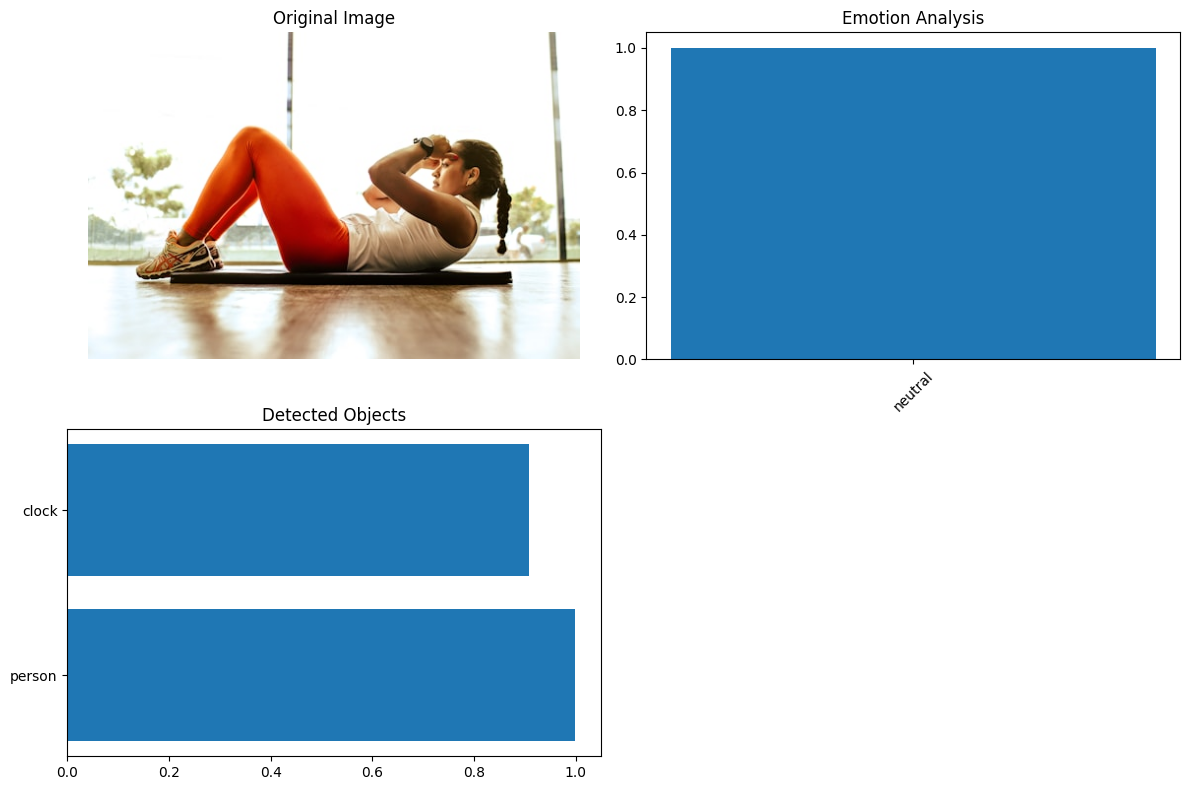

------------------------------

📸 ANALYZING IMAGE 4/5
🚀 MOMENTUM AI - IMAGE ANALYSIS
✅ Image loaded successfully
🔍 Analyzing place type from image...
😊 Analyzing emotions from image...
⚠️ No face detected — skipping emotion analysis.

🏞️  PLACE ANALYSIS:
   Detected Place: home
   Confidence: 86.61%
   Scene Label: restaurant, eating house, eating place, eatery
   Context Clues: work, social

😊 EMOTION ANALYSIS:
   Dominant Emotion: neutral
   Confidence: 0.00%
   Happiness Level: 0.00%

🔍 DETECTED OBJECTS:
   - bottle (86.62%)
   - chair (99.30%)
   - bottle (86.08%)


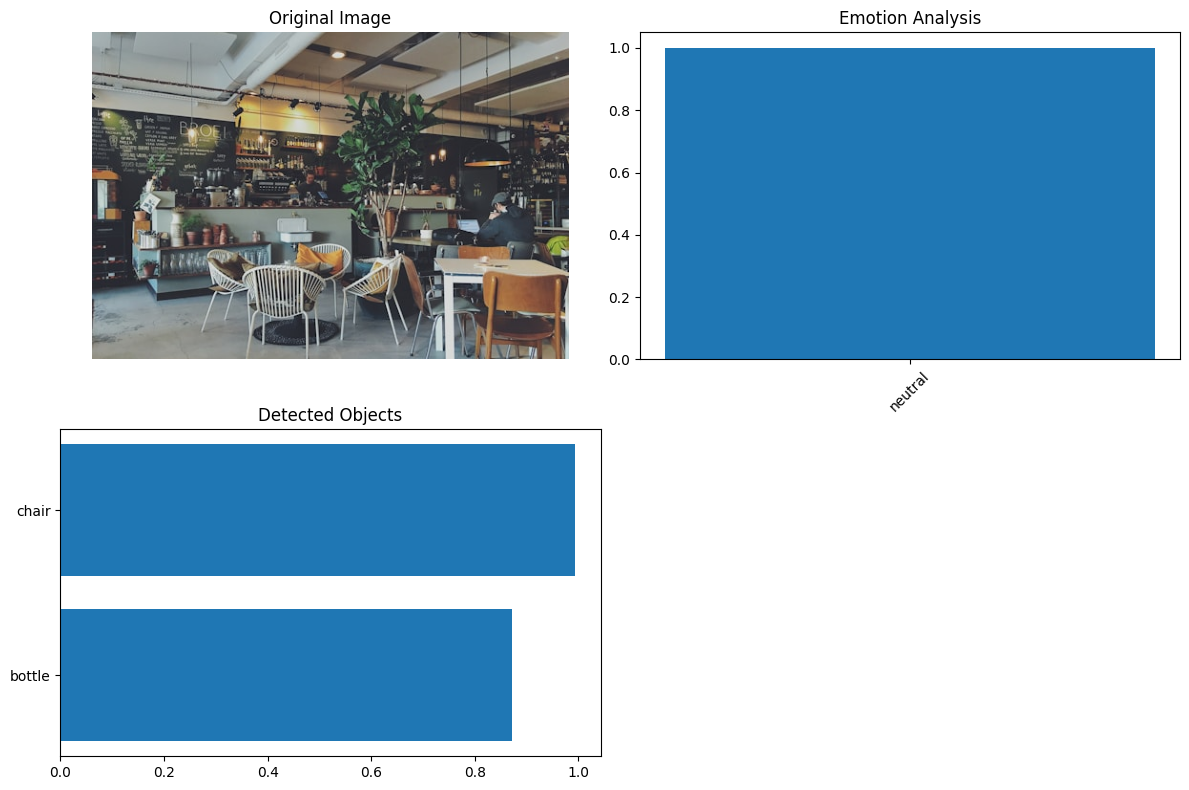

------------------------------

📸 ANALYZING IMAGE 5/5
🚀 MOMENTUM AI - IMAGE ANALYSIS
✅ Image loaded successfully
🔍 Analyzing place type from image...
😊 Analyzing emotions from image...
⚠️ No face detected — skipping emotion analysis.

🏞️  PLACE ANALYSIS:
   Detected Place: outdoor
   Confidence: 82.97%
   Scene Label: alp
   Context Clues: 

😊 EMOTION ANALYSIS:
   Dominant Emotion: neutral
   Confidence: 0.00%
   Happiness Level: 0.00%

🔍 DETECTED OBJECTS:


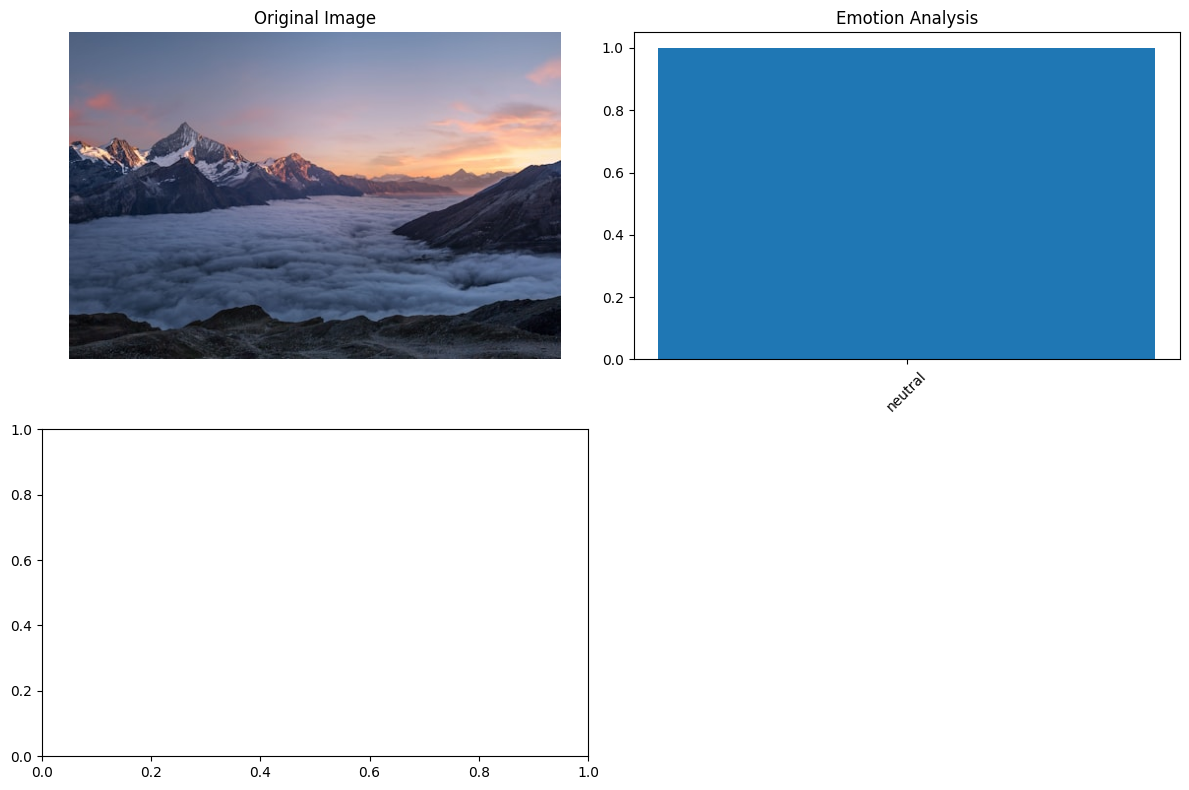

------------------------------

✅ Completed analysis of 5 images


In [6]:
# ========================================
# CELL 5: Demo Images and Analysis
# ========================================

# Demo image URLs - you can replace these with your own images
DEMO_IMAGES = [
    "https://images.unsplash.com/photo-1507525428034-b723cf961d3e?w=500",  # Beach
    "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=500",  # Mountain
    "https://images.unsplash.com/photo-1571019613454-1cb2f99b2d8b?w=500",  # Gym
    "https://images.unsplash.com/photo-1554118811-1e0d58224f24?w=500",    # Cafe
    "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=500"   # Park
]

print("🎯 ANALYZING DEMO IMAGES...")
print("This will analyze 5 different images to build a user profile")

# Analyze all demo images
user_profile_analyses = []

for i, image_url in enumerate(DEMO_IMAGES):
    print(f"\n📸 ANALYZING IMAGE {i+1}/5")
    analysis = analyze_single_image(image_url, momentum_ai, is_url=True)

    if analysis:
        user_profile_analyses.append(analysis)

    print("-" * 30)

print(f"\n✅ Completed analysis of {len(user_profile_analyses)} images")

In [7]:
# ========================================
# CELL 6: Generate Location Suggestions
# ========================================

print("\n" + "=" * 60)
print("🎯 GENERATING PERSONALIZED LOCATION SUGGESTIONS")
print("=" * 60)

# Generate suggestions based on user profile
suggestions = generate_location_suggestions(user_profile_analyses, momentum_ai)

print("\n💡 TOP LOCATION SUGGESTIONS FOR YOU:")
print("-" * 40)

for i, suggestion in enumerate(suggestions, 1):
    print(f"\n{i}. {suggestion['place_type'].upper()} LOCATIONS")
    print(f"   Predicted Happiness: {suggestion['predicted_happiness']:.0%}")
    print(f"   Match Score: {suggestion['match_score']:.2f}")
    print(f"   Suggestion: {suggestion['suggestion_text']}")
    print(f"   Activities: {', '.join(suggestion['recommended_activities'])}")
    print("-" * 40)

# Generate overall insights
print("\n📊 YOUR HAPPINESS PATTERNS:")
happiest_places = find_happiest_places(user_profile_analyses)

for place, happiness in happiest_places[:3]:
    print(f"   • {place}: {happiness:.0%} average happiness")

user_prefs = extract_user_preferences(user_profile_analyses)
print(f"\n🎯 YOUR PREFERRED ACTIVITIES:")
for activity in user_prefs['favorite_activities']:
    print(f"   • {activity}")

print("\n" + "=" * 60)
print("✅ ANALYSIS COMPLETE!")
print("=" * 60)


🎯 GENERATING PERSONALIZED LOCATION SUGGESTIONS
💡 Generating smarter, context-aware location suggestions...

💡 TOP LOCATION SUGGESTIONS FOR YOU:
----------------------------------------

1. BEACH LOCATIONS
   Predicted Happiness: 85%
   Match Score: 0.85
   Suggestion: Based on your enjoyment of work, social activities,
    beach locations in Egypt could be perfect for you. 
    These places typically offer surfing, sunbathing. And it's cheaper than Dubai.
   Activities: surfing, sunbathing, beach volleyball
----------------------------------------

2. HOME LOCATIONS
   Predicted Happiness: 65%
   Match Score: 0.65
   Suggestion: Based on your enjoyment of work, social activities,
    home locations in Egypt could be perfect for you. 
    These places typically offer cooking, relaxing. And its a great place to start off.
   Activities: cooking, relaxing, family time
----------------------------------------

📊 YOUR HAPPINESS PATTERNS:
   • beach: 0% average happiness
   • outdoor: 0% av

📸 ANALYZE YOUR OWN IMAGES
🚀 MOMENTUM AI - IMAGE ANALYSIS
✅ Image loaded successfully
🔍 Analyzing place type from image...
😊 Analyzing emotions from image...

🏞️  PLACE ANALYSIS:
   Detected Place: library
   Confidence: 87.41%
   Scene Label: library
   Context Clues: dining, work, social

😊 EMOTION ANALYSIS:
   Dominant Emotion: happy
   Confidence: 74.25%
   Happiness Level: 74.25%

🔍 DETECTED OBJECTS:
   - book (90.54%)
   - cell phone (71.96%)
   - book (70.58%)


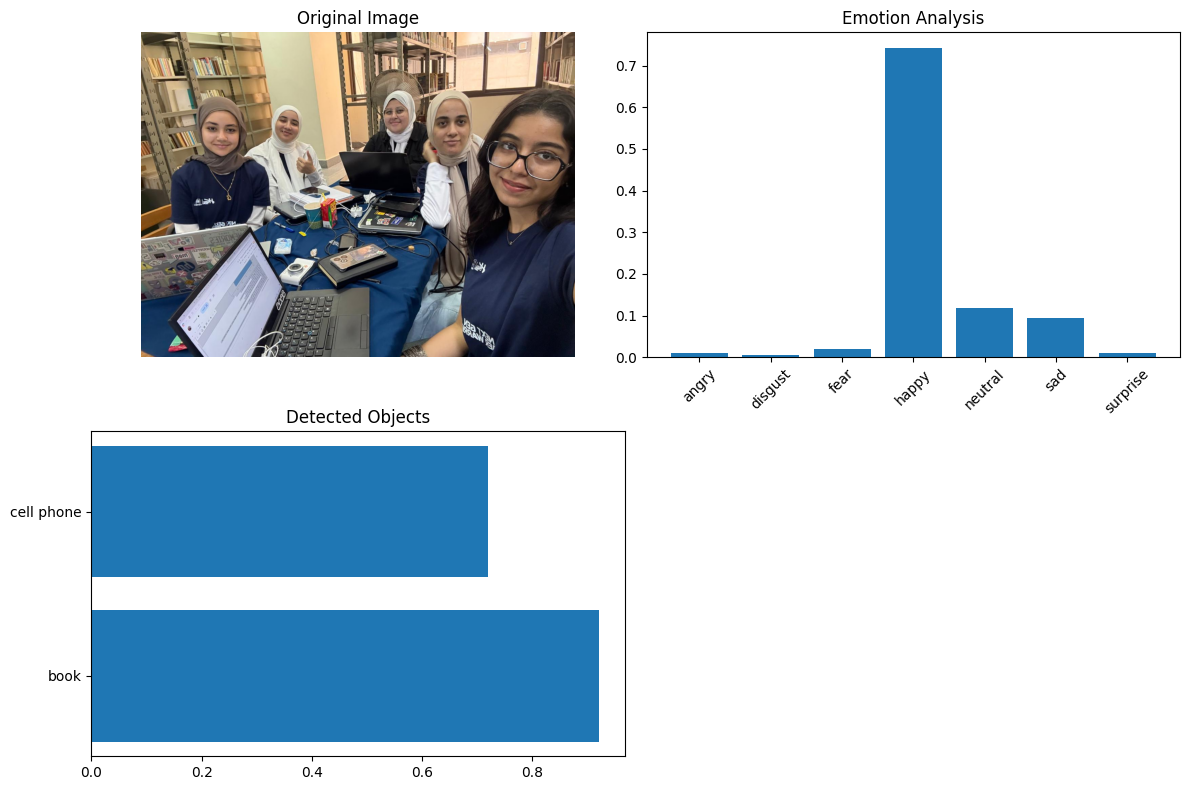

_____________________________________________________________________
💡 Generating smarter, context-aware location suggestions...
Your personalized suggestions:
- mountain: Based on your enjoyment of dining, work, social activities,
    mountain locations in Egypt could be perfect for you. 
    These places typically offer hiking, rock climbing. I think if you're looking for a hike it's definitely the right place.
- home: Based on your enjoyment of dining, work, social activities,
    home locations in Egypt could be perfect for you. 
    These places typically offer cooking, relaxing. And some other things you'd like.


In [9]:
# ========================================
# CELL 7: Analyze Your Own Images (Optional)
# ========================================

# Uncomment and modify this section to analyze your own images

print("📸 ANALYZE YOUR OWN IMAGES")
#print("Replace the image paths below with your own images")

# Example: Analyze custom images
custom_images = [

     "/content/WhatsApp Image 2025-09-16 at 12.49.15 PM.jpeg"
 ]

custom_analyses = []
for image_path in custom_images:
     analysis = analyze_single_image(image_path, momentum_ai, is_url=False)
     print("_____________________________________________________________________")
     if analysis:
         custom_analyses.append(analysis)


# Generate suggestions for your images
custom_suggestions = generate_location_suggestions(custom_analyses, momentum_ai)

print("Your personalized suggestions:")
for suggestion in custom_suggestions:
     print(f"- {suggestion['place_type']}: {suggestion['suggestion_text']}")

#print("💡 To use your own images:")
#print("1. Upload images to Colab files panel")
#print("2. Uncomment the code above")
#print("3. Replace paths with your image file names")
#print("4. Run this cell again")